# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [0]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [3]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
#建立模型
model = Sequential()

In [0]:
model.add(Dense(units = 32 , input_dim = 784 , kernel_initializer = 'normal' ,activation = 'relu'))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'softmax'))

# 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['acc'])

In [11]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 190us/step - loss: 0.3917 - acc: 0.8849 - val_loss: 0.2215 - val_acc: 0.9357
Epoch 2/10
48000/48000 [==============================] - 8s 157us/step - loss: 0.1979 - acc: 0.9404 - val_loss: 0.1821 - val_acc: 0.9466
Epoch 3/10
48000/48000 [==============================] - 7s 155us/step - loss: 0.1549 - acc: 0.9539 - val_loss: 0.1600 - val_acc: 0.9528
Epoch 4/10
48000/48000 [==============================] - 7s 156us/step - loss: 0.1286 - acc: 0.9613 - val_loss: 0.1617 - val_acc: 0.9511
Epoch 5/10
48000/48000 [==============================] - 8s 157us/step - loss: 0.1091 - acc: 0.9665 - val_loss: 0.1537 - val_acc: 0.9516
Epoch 6/10
48000/48000 [==============================] - 7s 155us/step - loss: 0.0976 - acc: 0.9701 - val_loss: 0.1441 - val_acc: 0.9598
Epoch 7/10
48000/48000 [==============================] - 7s 154us/step - loss: 0.0857 - acc: 0.9729 - val_loss: 0.1239 - 

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

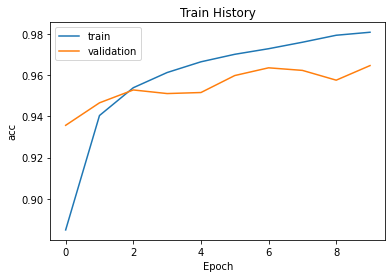

In [13]:
show_train_history(train_history,'acc','val_acc')

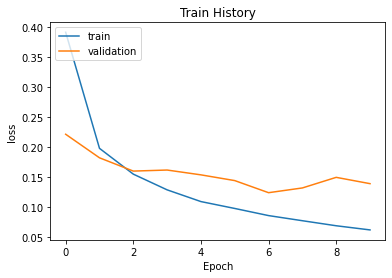

In [14]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [15]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 72us/step

accuracy= 0.9646999835968018
